# Quantum Fourier Transform Cross-Verification

<u>NOTE</u>: Remeber to try to hit **Restart** if something is wrong and then **Run All** again.

## Introduction
This module run experiments of QFT algorithm on different Quantum Computing platform and compare the correctness of each random input configuration to each quantum computing platform. 

Each module based on a specific quantum computing platform must implement a function such that it takes parameters:
-   A number of qubits used.
-   A random configuration of a bitstring of 0's and 1's input state.
-   A number of shots for each configuration run.

And returns:
-   A map of counts of each measurement outcome correspond to a configuration input state.

Optional: Print the circuit out in the function

This module will then demonstrate the statistic of each experiment on different type of quantum computers

## Set up


In [1]:
import random
import matplotlib.pyplot as plt
from qft_trapped_ion import *

# Import package of ie. qft_super_conducting.py, qft_photonic.py, qft_neutral_atom.py here


/home/ugrads/majors/ttv27042004/CS4134/.venv/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


## Histogram printing function

In [2]:
def printHistogram(dataset: map, title: str):
    
    # Extract x and y
    labels = list(dataset.keys())   
    values = list(dataset.values()) 

    # Plot
    plt.figure(figsize=(6,4))
    plt.bar(labels, values)
    plt.xlabel("Bitstring |x>")
    plt.ylabel("Counts")
    plt.title(title)
    plt.xticks(rotation=75)  # rotate if needed
    plt.show()

## 3-Qubit Experiment

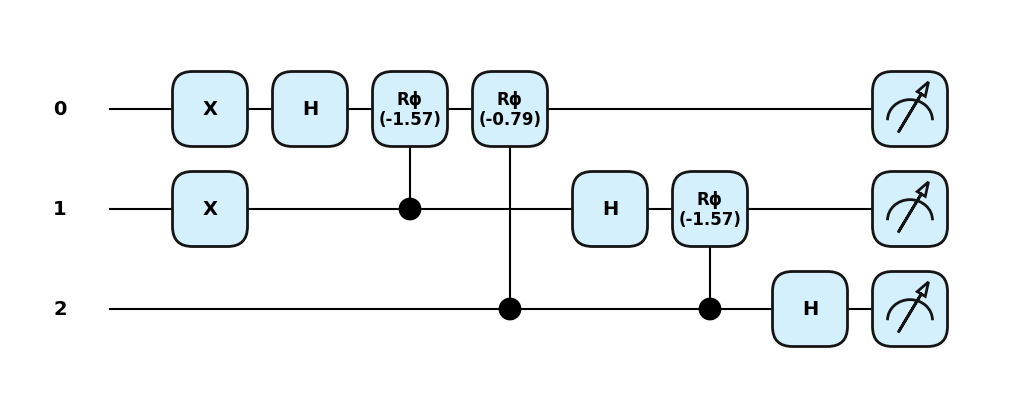

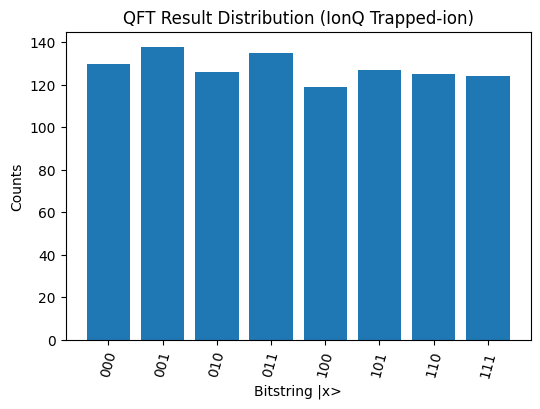

In [7]:
n = 3
config = [random.randint(0, 1) for _ in range(n)]
shots = 1024

result = qft_trapped_ion(n, config, shots)

printHistogram(result, "QFT Result Distribution (IonQ Trapped-ion)")


## 5-Qubit Experiment

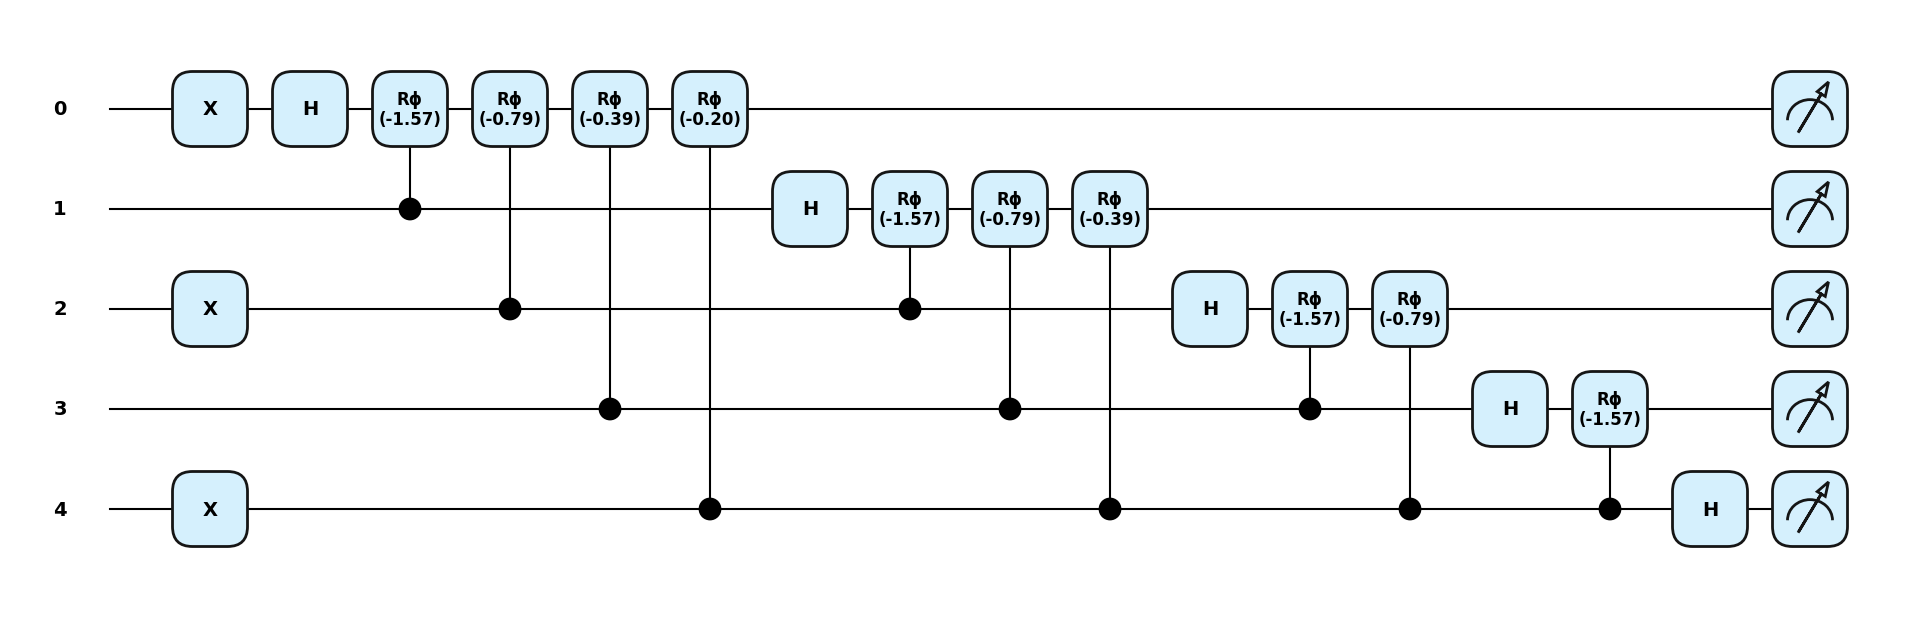

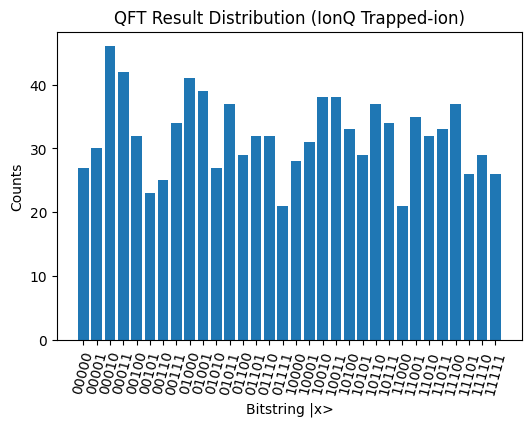

In [4]:
n = 5
config = [random.randint(0, 1) for _ in range(n)]
shots = 1024

result = qft_trapped_ion(n, config, shots)

printHistogram(result, "QFT Result Distribution (IonQ Trapped-ion)")
